In [40]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 83 kB/s eta 0:00:011
     |████████████████████████████████| 231 kB 1.2 MB/s eta 0:00:01


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# importing one hot encoder 
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()

In [3]:
df = pd.read_csv("wells_fargo_train.csv")
df.tail()

,Id,Fiscal Year,Term Type,Career,Program Level,Study Year,Campus_Id,Faculty Group,Program Grouping,Coop Regular,WorkTerm,Attendance,Visa Status,Gender,Unique Headcount
72244,72244,2014/15,Winter term,Undergraduate,Non-Degree,N,4,SCI,Science,Regular,Academic Term,Part-Time,Canadian,Male,25
72245,72245,2014/15,Winter term,Undergraduate,Non-Degree,N,4,SCI,Science,Regular,Academic Term,Part-Time,Canadian,Female,27
72246,72246,2014/15,Winter term,Undergraduate,Non-Degree,N,4,SCI,Science,Regular,Academic Term,Part-Time,Canadian Permanent Resident,Female,1
72247,72247,2014/15,Winter term,Undergraduate,Non-Degree,N,4,SCI,Science,Regular,Academic Term,Part-Time,International,Male,30
72248,72248,2014/15,Winter term,Undergraduate,Non-Degree,N,4,SCI,Science,Regular,Academic Term,Part-Time,International,Female,18


In [4]:
for col in df.columns:
    print(col, len(df[col].unique()))
    if len(df[col].unique())<11: print(df[col].unique())

Id 72249
Fiscal Year 7
['2008/09' '2009/10' '2010/11' '2011/12' '2012/13' '2013/14' '2014/15']
Term Type 3
['Fall term' 'Spring term' 'Winter term']
Career 2
['Graduate' 'Undergraduate']
Program Level 5
['Doctoral' 'Masters' 'Non-Degree' 'Qualifying' 'Bachelors']
Study Year 8
['D' 'M' 'N' '1' '2' '3' '4' '5']
Campus_Id 5
[4 0 2 1 3]
Faculty Group 10
['AHS' 'ARTS' 'ENG' 'ENV' 'MATH' 'SCI' 'THL' 'CFM' 'SE' 'REN']
Program Grouping 147
Coop Regular 2
['Regular' 'Co-op']
WorkTerm 2
['Academic Term' 'Work Term']
Attendance 3
['Full-Time' 'Part-Time' 'Unknown Attendance']
Visa Status 3
['Canadian' 'International' 'Canadian Permanent Resident']
Gender 3
['Male' 'Female' 'Another Gender Identity']
Unique Headcount 214


In [ ]:
'''Seeing data ka info:
Total col: 15
    ORDINAL(hence LABEL-Encoding): Career, Program Level, Attendance
    
    ONE-HOT Encoding(less hona hai): Term Type, Faculty Group, Coop Reg, Work Term, Visa,Gender
    
    Program Grouping?!
    
    NUMERICAL: year,study year,campus id,id,headcount
    
'''

<AxesSubplot:xlabel='Id'>

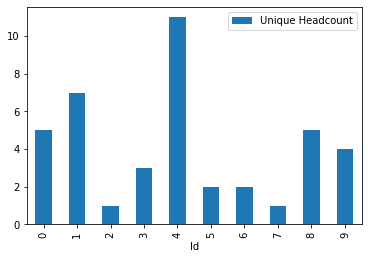

In [5]:
df.head(10).plot.bar('Id','Unique Headcount')

In [6]:
X=df.drop(['Career', 'Program Level', 'Attendance','Fiscal Year','Study Year','Campus_Id','Id','Unique Headcount'],axis=1)

df_OneHotEn = X

for col in X.columns:
    
    # reshape the 1-D col array to 2-D as fit_transform expects 2-D and finally fit the object 
    Y = onehotencoder.fit_transform(X[col].values.reshape(-1,1)).toarray()
    
    # To add this back into the original dataframe 
    dfOneHot = pd.DataFrame(Y, columns = [("%s_"%col +str(int(i))) for i in range(len(X[col].unique()))]) 
    df1 = pd.concat([df_OneHotEn, dfOneHot], axis=1)
    
    # dropping the country column 
    df_OneHotEn= df1.drop([col], axis=1) 

print(df_OneHotEn.columns)    

Index(['Term Type_0', 'Term Type_1', 'Term Type_2', 'Faculty Group_0',
       'Faculty Group_1', 'Faculty Group_2', 'Faculty Group_3',
       'Faculty Group_4', 'Faculty Group_5', 'Faculty Group_6',
       ...
       'Coop Regular_0', 'Coop Regular_1', 'WorkTerm_0', 'WorkTerm_1',
       'Visa Status_0', 'Visa Status_1', 'Visa Status_2', 'Gender_0',
       'Gender_1', 'Gender_2'],
      dtype='object', length=170)


In [8]:
df_OneHotEn.shape
df = pd.concat([df_OneHotEn, df], axis=1)

In [13]:
import statsmodels.api as sm

def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]

        r_squared = sm.OLS(y,x).fit().rsquared
        print("r_sq",r_squared)
        if 1!=r_squared:
            vif = round(1/(1-r_squared),2)
            vif_df.loc[i] = [x_var_names[i], vif]
        else: 
            print("inf",x_var_names[i])
            vif = "inf"
            vif_df.loc[i] = [x_var_names[i], vif]
            
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

res = calculate_vif(df[['Visa Status_1', 'Visa Status_2','Campus_Id']])

r_sq 0.3033177561930859
r_sq 0.2831279234909623
r_sq 0.4536485312237205


In [14]:
res

,Var,Vif
2,Campus_Id,1.83
0,Visa Status_1,1.44
1,Visa Status_2,1.39
